https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques.  
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.  <br>
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

QUESTION: <br>
predict (regression) sales price of each house <br>
target variable: sales price (salesprice variable) <br>
independant: house <br>
metric of evaluation of sales price: RMSE <br>

setting up and loading in data


In [124]:
import numpy as np                     # for numerical operations, arrays
import pandas as pd                   # for dataframes: load, clean, manipulate
from IPython.display import display   # for nicer table display in notebooks

# Visualisation
import matplotlib.pyplot as plt       # for base plotting
import seaborn as sns                # for nicer statistical plots built on matplotlib

# Modelling and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import (
    mean_squared_error, r2_score,
    accuracy_score, confusion_matrix, classification_report
)
from sklearn.impute import SimpleImputer

# Make plots a bit nicer
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Load data
df = pd.read_csv("AmesHousing.csv")


 **Intial Data Exploration**.  
**Goal:** Understand size, columns, types, obvius issues (missing values).  
**Part 1:** Overview of Data.  

In [125]:
# 1. Preview the data
print("=== HEAD ===")
display(df.head())

# 2. Shape of data
print("\n=== SHAPE ===")
print(df.shape)

# 3. Info
print("\n=== INFO ===")
df.info()

# 4. Summary statistics
print("\n=== DESCRIBE (NUMERIC) ===")
display(df.describe())

# print("\n=== MISSING VALUES ===")
# missing = df.isna().sum().sort_values(ascending=False)
# display(missing)

# 5. Identify numeric + categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("\n=== NUMERIC COLUMNS ===")
print(numeric_cols)

print("\n=== CATEGORICAL COLUMNS ===")
print(categorical_cols)



=== HEAD ===


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900



=== SHAPE ===
(2930, 82)

=== INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        293

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000



=== NUMERIC COLUMNS ===
['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']

=== CATEGORICAL COLUMNS ===
['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin T

**Initial Data Exploration**      
**Part 2:** Dealing with Missing Values, Dulicate Values  
**Goal:** To understand which values are missing/duplicated and decide what method of dealing with this

In [152]:
# ============================
# 1. Missing Values Overview
# ============================

# Create dataframe with count and percentage of missing values per column
missing_before = pd.DataFrame({
    'missing_count': df.isna().sum(),                   # Count of NaNs per column
    'missing_pct': df.isna().mean() * 100               # Percentage of NaNs per column
})

# Keep only columns with at least one missing value
missing_before = missing_before[missing_before['missing_count'] > 0]

# Sort by highest percentage of missing values
missing_before = missing_before.sort_values('missing_pct', ascending=False)

display(missing_before)

# Check duplicate rows
print("Duplicate rows:", df.duplicated().sum())


# ============================
# 2. Handle Missing Values
# ============================

# Step 1: Drop columns with extremely high missingness (>80%)
high_missing_cols = missing_before[missing_before['missing_pct'] > 80].index
print("\nDropping columns with >80% missingness:", list(high_missing_cols))

df = df.drop(columns=high_missing_cols)


# Step 2: Re-identify numeric and categorical columns after dropping
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()


# Step 3: Impute numeric columns using median
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())


# Step 4: Impute categorical columns using mode (most common value)
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


# Step 5: Final check to ensure no missing values remain
print("\nTotal missing values after imputation:", df.isna().sum().sum())

# NOTE:
# Missing values have now been addressed.
# Any subsequent missing-value checks will return 0 unless the dataset is reloaded.

# ============================
# Preview the data post dropping and imputation
# ============================ 

# 1. Preview the data
print("=== HEAD ===")
display(df.head())

# 2. Shape of data
print("\n=== SHAPE ===")
print(df.shape)

print("\n=== NUMERIC COLUMNS ===")
print(numeric_cols)

print("\n=== CATEGORICAL COLUMNS ===")
print(categorical_cols)

,missing_count,missing_pct


Duplicate rows: 0

Dropping columns with >80% missingness: []

Total missing values after imputation: 0
=== HEAD ===


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900



=== SHAPE ===
(2930, 78)

=== NUMERIC COLUMNS ===
['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']

=== CATEGORICAL COLUMNS ===
['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Ty

**Part 2:** Univariate Analysis of Target Variables (Sales Price)


=== Summary Statistics ===
count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.7435000757376466

=== Histogram ===


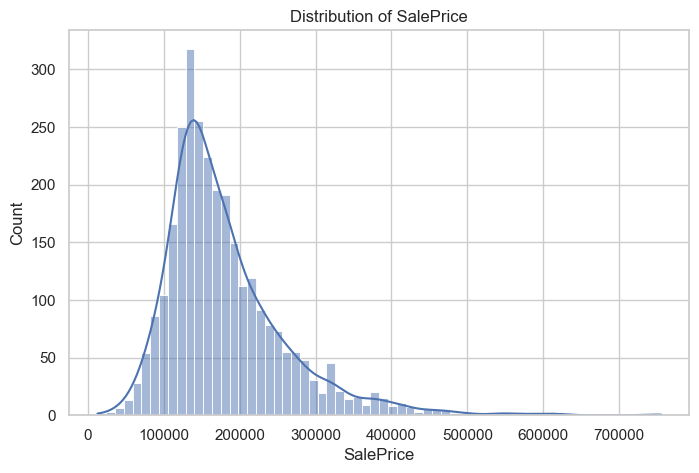


=== Histogram with Mean/median and Q-Q Plot ===


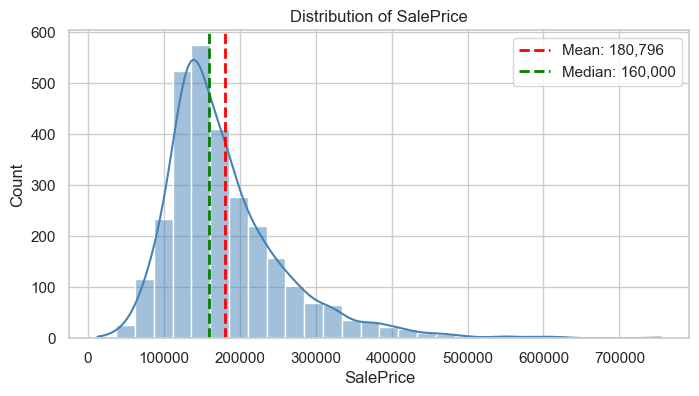


=== Boxplot for Outlier Detection ===


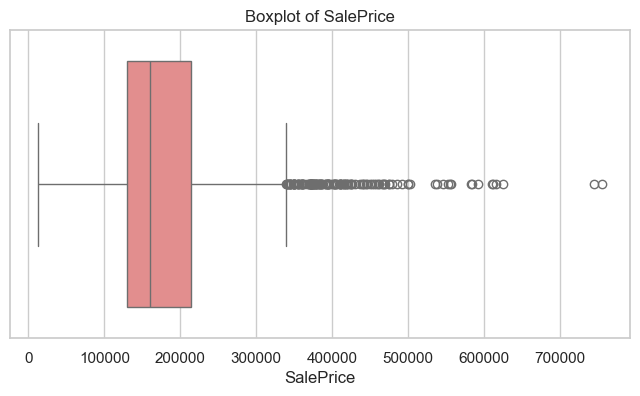

=== TARGET VALUE COUNTS ===
Pave    2918
Grvl      12
Name: Street, dtype: int64

=== TARGET PROPORTIONS ===
Pave    0.995904
Grvl    0.004096
Name: Street, dtype: float64


/var/folders/0w/cg0xyzt5583__mzw21n1jqgm0000gn/T/ipykernel_13947/2533661919.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_col, data=df, palette="pastel")


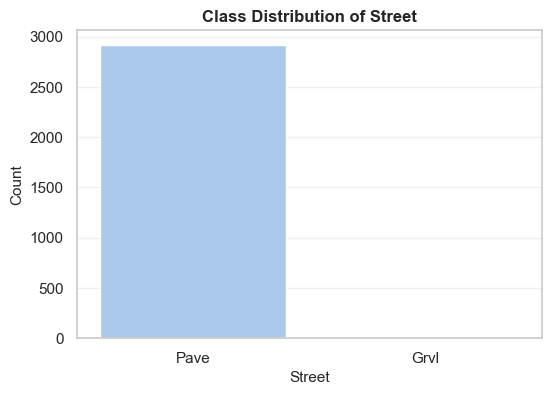

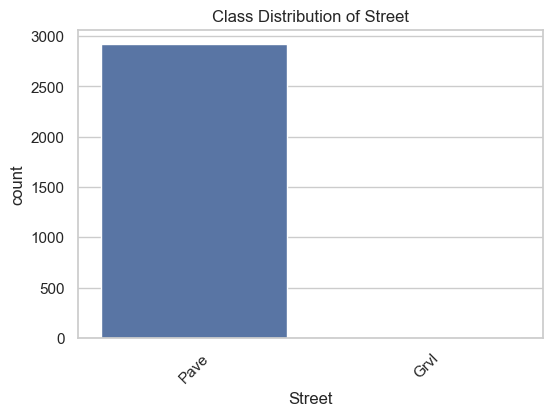

In [ ]:
# ============================
# Target Variable Analysis - Summary Statistics
# ============================

print("\n=== Summary Statistics ===")
target_col = "SalePrice"
print(df[target_col].describe())

print("\nSkewness:", df[target_col].skew())

# ============================
# Histogram 
# ============================

print("\n=== Histogram ===")
plt.figure()
sns.histplot(df[target_col], kde=True)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.show()

# ============================
# Histogram with Mean/median and Q-Q Plot and Boxplot
# ============================
print("\n=== Histogram with Mean/median and Q-Q Plot ===")
plt.figure(figsize=(8, 4))
sns.histplot(df[target_col], kde=True, bins=30, color="steelblue")

# Calculate mean + median
mean_val = df[target_col].mean()
median_val = df[target_col].median()

# Overlay vertical lines
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean_val:,.0f}")
plt.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f"Median: {median_val:,.0f}")

plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.legend()
plt.show()

#  Boxplot for outlier detection    
print("\n=== Boxplot for Outlier Detection ===")
plt.figure(figsize=(8, 4))
sns.boxplot(x=df[target_col], color="lightcoral")
plt.title("Boxplot of SalePrice")
plt.xlabel("SalePrice")
plt.show()


# # Q-Q plot (normality check) - if needed then use
# plt.figure(figsize=(6, 6))
# stats.probplot(sale_scaled.values, dist="norm", plot=plt)
# plt.title('Q-Q Plot (Normality Check)', fontsize=12, fontweight='bold')
# plt.grid(True, alpha=0.3)
# plt.show()

# # ============================
# # 2. Target Variable Analysis - Side by Side Plots (the guys code)
# # ============================

# print("\n===Histogram with Mean/median and Q-Q Plot Side by Side===")
# #  use SalePrice from your dataframe
# sale = df['SalePrice'].dropna()
# sale_scaled = sale / 100_000.0   # show prices in 100k units (optional)

# fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# # Histogram + mean/median lines
# axes[0].hist(sale_scaled, bins=50, alpha=0.75, color='steelblue', edgecolor='black')
# axes[0].axvline(sale_scaled.mean(), color='red', linestyle='--', linewidth=2,
#                 label=f'Mean: {sale_scaled.mean():.2f} ×$100k')
# axes[0].axvline(np.median(sale_scaled), color='green', linestyle='--', linewidth=2,
#                 label=f'Median: {np.median(sale_scaled):.2f} ×$100k')
# axes[0].set_xlabel('House Price (×$100k)', fontweight='bold', fontsize=11)
# axes[0].set_ylabel('Frequency', fontweight='bold', fontsize=11)
# axes[0].set_title('Target Variable Distribution', fontweight='bold', fontsize=12)
# axes[0].legend(fontsize=10)
# axes[0].grid(True, alpha=0.3)


# # Q-Q plot (normality check)
# from scipy import stats
# stats.probplot(sale_scaled.values, dist="norm", plot=axes[1])
# axes[1].set_title('Q-Q Plot (Normality Check)', fontweight='bold', fontsize=12)
# axes[1].grid(True, alpha=0.3)

# fig.suptitle('Figure 1: Target Variable Analysis', fontweight='bold', fontsize=14, y=0.98)
# plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.show()

# ============================
# 3. Categorical Feature Analysis
# ============================
target_col = "Street"   # 0 = no churn, 1 = churn
print("=== TARGET VALUE COUNTS ===")
print(df[target_col].value_counts())

print("\n=== TARGET PROPORTIONS ===")
print(df[target_col].value_counts(normalize=True))

plt.figure(figsize=(6,4))
sns.countplot(x=target_col, data=df, palette="pastel")
plt.title(f"Class Distribution of {target_col}", fontsize=12, fontweight='bold')
plt.xlabel(target_col, fontsize=11)
plt.ylabel("Count", fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.show()
# if target has more than one class
plt.figure(figsize=(6,4))
sns.countplot(x=target_col, data=df)
plt.title(f"Class Distribution of {target_col}")
plt.xticks(rotation=45)
plt.show()

Bivariate EDA - relationship with target